In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
df = pd.read_csv('Position_Salaries.csv')

In [10]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [12]:
x = df.iloc[:,1:-1].values

In [13]:
y = df.iloc[:,-1].values

In [14]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [15]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x,y)

LinearRegression()

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly_reg = PolynomialFeatures(degree = 3)

In [41]:
x_poly = poly_reg.fit_transform(x)

In [42]:
x_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [43]:
lin_reg = LinearRegression()

In [44]:
lin_reg.fit(x_poly,y)

LinearRegression()

## Visualizing the Linear Regression Results 

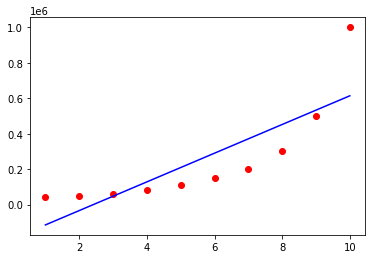

In [35]:
plt.scatter(x,y ,color="red")
plt.plot(x, lr.predict(x), color="blue")
plt.show()

## Visualizing the Polynomial Regression Results 

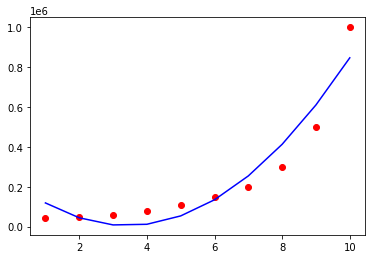

In [39]:
# in case of degree 2
plt.scatter(x,y , color="red")
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x)), color="blue")
plt.show()

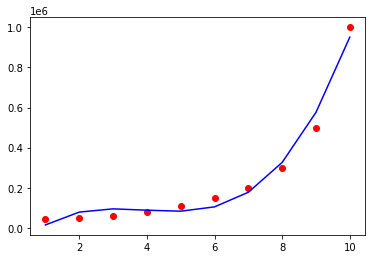

In [45]:
# in case degree is 3 a more accurate result
plt.scatter(x,y , color="red")
plt.plot(x, lin_reg.predict(poly_reg.fit_transform(x)), color="blue")
plt.show()

## Predicting a new result with Linear Regression

In [47]:
lr.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [49]:
lin_reg.predict(poly_reg.fit_transform([[6.5]]))

array([133259.46969697])